## **Building (Enterprise) Reliable Single AI Agents with Azure AI Foundry Agent Service**

### **So, What is an Agent?**

When asked, "What is an agent?" you might hear, "James Bond, of course!" or even, "An entire team of secret agents!" In our realm, however, an agent isn’t a spy—it’s an **autonomous computational entity** powered by foundational models (like LLMs or SLMs). Think of it as a digital 007 that observes, plans, and acts based on its environment.

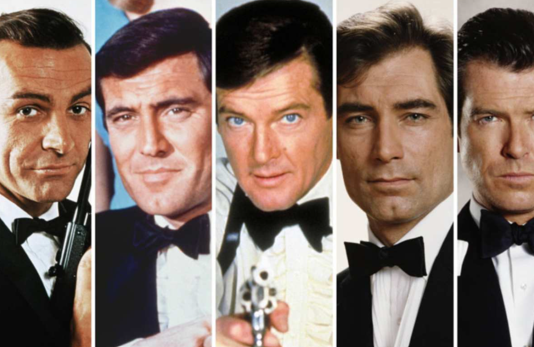

### **The AI Agent – A New Breed of Intelligence**

In my view, the best way to describe an AI agent is through the lens of a *Generative Agent*. Researchers at Stanford pioneered this concept by creating AI entities that mimic human-like behavior in simulated environments. Drawing on the paper [*"Generative Agents: Interactive Simulacra of Human Behavior"* by Joon Sung Park, Joseph C. O'Brien, and colleagues](https://arxiv.org/abs/2304.03442) (definitely worth a read!), these agents are much more than simple bots. They wake up, make breakfast, form friendships, and even throw parties. Just as James Bond recalls past missions to shape his next move, generative agents retain "memories" of their experiences to make nuanced, contextually aware decisions.

These agents don’t simply react—they **reflect, strategize, and plan**. Stanford’s approach involves crafting an architecture where agents remember past interactions, consolidate them into reflections, and dynamically retrieve relevant memories to guide future behavior. Picture each AI agent as a unique character in a bustling digital town, complete with quirks, ambitions, and social lives. With observation, planning, and reflection at their core, these generative agents go beyond automation to create simulations that feel truly human.

### **Understanding The Anatomy of an Agent: Ordering Pizza with a Twist (007 Style)**

Even James Bond, 007, needs to eat. When hunger strikes, he decides on pizza. Here’s how his process mirrors an AI agent’s workflow:

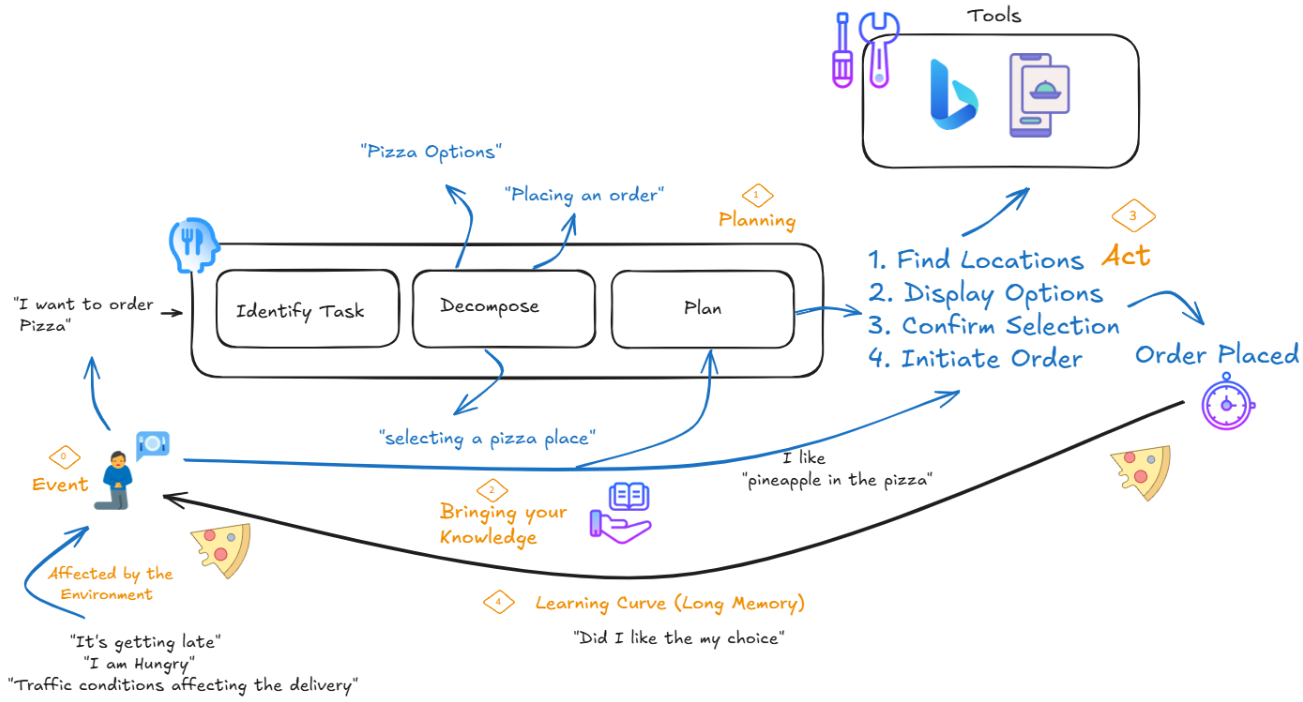

- **Perception: Understanding the Problem**  
  Bond realizes it’s late and that he needs food—quickly. Factors like traffic, time, and his current location shape his decision. Similarly, an AI agent begins by taking in external data (such as traffic conditions, user preferences, and time constraints) to clearly define the problem.

- **Decomposition: Breaking Down the Problem**  
  Next, Bond identifies the steps: finding nearby pizzerias, choosing the best option, and arranging delivery. Likewise, an AI agent breaks the problem into actionable tasks—searching for restaurants, filtering by criteria (e.g., delivery speed), and placing an order.

- **Planning: Formulating a Strategy**  
  Bond carefully weighs his options—speed versus quality—and selects the best pizzeria based on reputation. Similarly, AI agents evaluate constraints and user preferences to determine an optimal plan.

- **Tool Utilization: Using Resources**  
  Bond leverages his gadgets—perhaps a smartwatch or an app—to check menus and place his order. AI agents use tools like APIs, external databases, or recommendation engines to gather and process information.

- **Action: Executing the Plan**  
  With a plan in place, Bond places his order and waits for confirmation. The AI agent, in parallel, executes the task by sending requests, tracking progress, and updating systems.

- **Feedback and Reflection: Evaluating the Outcome**  
  Once the pizza arrives, Bond assesses whether it was on time and met his expectations. Similarly, AI agents review outcomes, measuring success against predefined criteria and learning from each experience.

- **Memory: Retaining Lessons Learned**  
  Bond stores his experience for future reference—both as a short-term update and as a long-term memory. Likewise, AI agents update their memory to improve performance over time, ensuring smarter decision-making in future tasks.


#### **Let's define the Foundational Architecture of a Single AI Agent**

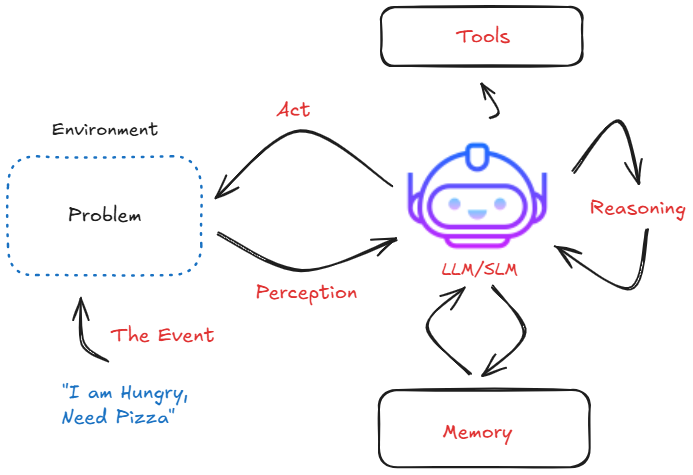

- **Perception:** The agent processes external inputs (e.g., "I am hungry, need pizza") to understand the task and its context.
+ **Reasoning:** Utilizing LLMs or SLMs, the agent interprets input, evaluates options, and formulates a strategy.
- **Memory:** The agent accesses and updates memory to leverage past interactions, ensuring adaptive decision-making.
+ **Tools:** External resources (APIs, databases, applications) are used to perform specific operations—like finding a pizza place or calculating delivery times.
- **Action:** The agent executes the planned task, translating reasoning into tangible outputs, such as placing orders or delivering updates.


### Building Reliable Single AI Agents with Azure AI Foundry Agent Service

Azure AI Foundry Agent Service makes it simple to create and deploy intelligent, secure, and scalable AI agents without managing the underlying infrastructure. This fully managed platform streamlines every step—from initializing agents as microservices to automatically invoking the right tools based on user input. By handling conversation state, logger.ging every interaction, and integrating with over 1,400 connectors (such as logger.ic Apps and Azure Functions), it frees you to focus on designing smart workflows.

The service also grounds agent responses with real-time data from sources like Bing and SharePoint, while offering flexibility with multiple language models (including GPTs, Meta and Llama) and support for various data types. Security is built in, with features such as BYO storage and keyless authentication ensuring enterprise-grade protection.

**In short, Azure AI Foundry Agent Service empowers you to build reliable single-agent systems quickly and efficiently, serving as the foundation for more complex, multi-agent solutions—all while reducing development complexity and ensuring robust performance.**

So, let's go ahead and create an agent with Azure AI Foundry Agent Service! 🤖🚀

In [1]:
import os

from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Define the target directory
target_directory = os.getcwd()  # Get the current working directory

# Move one directory back
parent_directory = os.path.dirname(target_directory)

# Check if the parent directory exists
if os.path.exists(parent_directory):
    # Change the current working directory to the parent directory
    os.chdir(parent_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Parent directory {parent_directory} does not exist.")

Directory changed to c:\Users\pablosal\Desktop\gbb-ai-agenticrag


## **Prerequisites**

### Step 1: Set Up Azure Foundry

**Hierarchy Overview**:

- **Azure AI Foundry**: Integrated platform for building, testing, and deploying AI models and applications.
- **Azure AI Agent Service**: Managed service within Foundry for creating and managing AI agents.

**Goal**: Create AI agents using Azure AI Agent Service within Azure AI Foundry.

**Quick Start Steps**:

1. **Access Azure AI Foundry**  
   - Go to the [Azure AI Foundry portal](https://ai.azure.com/) and sign in.

2. **Create a Project**  
   - Click **"Create a new project"**.
   - Fill in:
     - **Project Name**: `agentic-lab-eastus-dev`
     - **Subscription**: Your Azure subscription
     - **Resource Group**: Existing or new
     - **Region**: East US
   - Click **"Create"**.

3. **Get Your Project Endpoint**  
   - Select your project (**agentic-lab-eastus-dev**) in the Azure AI Foundry portal.
   - **Copy the endpoint URL** from the project overview page.  
      The endpoint will look like:  
      ```
      https://<AIFoundryResourceName>.services.ai.azure.com/api/projects/<ProjectName>
      ```
   - *Tip*: You can also find this endpoint under **Libraries > Azure AI Foundry** in the portal.  

4. **Configure Environment**  
   - Paste the connection string into the `AZURE_AI_FOUNDRY_URL` parameter in your `.env` file.

5. **Install Required Python Packages**  
   Run the following in your terminal:
   ```bash
   pip install azure-ai-projects
   pip install azure-identity
   ```

6. **Authenticate with Azure**  
   Sign in to your Azure subscription:
   ```bash
   az logger.in
   ```

For more details, see the [official documentation](https://learn.microsoft.com/en-us/azure/ai-services/agents/quickstart?pivots=programming-language-python-azure).

In [2]:
import importlib.metadata as md
from utils.ml_logging import get_logger
from azure.core.exceptions import HttpResponseError
from azure.identity import DefaultAzureCredential
from azure.ai.agents import AgentsClient
from azure.ai.agents.models import (
    FunctionTool,
    ToolSet,
    ToolOutput,
    RequiredFunctionToolCall,
    SubmitToolOutputsAction,
    RunStatus,
    MessageTextContent,
    ListSortOrder,
)

# Versions - we are currently 1.0.0b9 of azure-ai-projects
print("azure-ai-projects version:", md.version("azure-ai-agents"))
# if you want to Upgrade the SDKs, uncomment the line below but code might break
# %pip install -U azure-ai-agents azure-identity

logger = get_logger()

# Connect to the AI Foundry project
project_connection_string = os.getenv("AZURE_AI_FOUNDRY_URL")
agents_client = AgentsClient(
    endpoint=project_connection_string,
    credential=DefaultAzureCredential(),
)

logger.info("Azure AI Agents Foundry project client created successfully")

2025-05-28 15:39:57,948 - micro - MainProcess - INFO     Azure AI Agents Foundry project client created successfully (1277011103.py:<module>:31)


azure-ai-projects version: 1.0.0


## **Helpers Functions**

In [3]:
def get_agents_client() -> AgentsClient:
    """Return an authenticated AgentsClient based on env vars."""
    endpoint = os.getenv("AZURE_AI_FOUNDRY_URL")
    if not endpoint:
        logger.error("AZURE_AI_FOUNDRY_URL must be set")
        sys.exit(1)
    cred = DefaultAzureCredential()
    return AgentsClient(endpoint=endpoint, credential=cred)


def get_model_deployment() -> str:
    """Return the model deployment name from env vars."""
    dep = os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
    if not dep:
        logger.error("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID must be set")
        sys.exit(1)
    return dep


def create_agent(
    client: AgentsClient, deployment: str, toolset: ToolSet | None = None
) -> str:
    """Create an agent (optionally with tools) and return its ID."""
    try:
        agent = client.create_agent(
            model=deployment,
            name="demo-agent",
            instructions="You are a concise assistant.",
            toolset=toolset,
        )
        logger.info("Agent created: %s", agent.id)
        return agent.id
    except HttpResponseError as e:  # pragma: no cover
        logger.error("Agent creation failed: %s", e)
        sys.exit(1)


def create_thread(client: AgentsClient) -> str:
    """Start a new conversation thread."""
    t = client.threads.create()
    logger.info("Thread created: %s", t.id)
    return t.id


def post_message(client: AgentsClient, thread_id: str, role: str, text: str) -> None:
    """Post a message to a thread."""
    m = client.messages.create(thread_id=thread_id, role=role, content=text)
    logger.debug("Message posted: %s", m.id)

## **Basic Conversation – No Tools**

In [4]:
client = get_agents_client()
deploy = get_model_deployment()

with client:
    agent_id = create_agent(client, deploy)
    thread_id = create_thread(client)
    post_message(client, thread_id, "user", "Why should I visit Madrid in 100 words?")

    run = client.runs.create_and_process(thread_id=thread_id, agent_id=agent_id)
    logger.info("Run finished with status → %s", run.status)

    print("\n— Conversation —")
    for msg in client.messages.list(thread_id, order=ListSortOrder.ASCENDING):
        last = msg.text_messages[-1] if msg.text_messages else None
        if isinstance(last, MessageTextContent):
            role = "YOU" if msg.role == "user" else "AZURE AI FOUNDRY AGENT"
            print(f"{role}: {last.text.value}")

    client.delete_agent(agent_id)
    logger.info("Agent %s deleted", agent_id)

2025-05-28 15:40:05,006 - micro - MainProcess - INFO     Agent created: asst_dUztJKZ3PBMK6c5ARb8ZX6JH (705178453.py:create_agent:27)
2025-05-28 15:40:05,507 - micro - MainProcess - INFO     Thread created: thread_zahiu1wawuIYFQVNqduRekGd (705178453.py:create_thread:36)
2025-05-28 15:40:10,541 - micro - MainProcess - INFO     Run finished with status → RunStatus.COMPLETED (2978901451.py:<module>:13)



— Conversation —
YOU: Why should I visit Madrid in 100 words?
AZURE AI FOUNDRY AGENT: Madrid is a vibrant hub of culture, history, and gastronomy. Explore world-class museums like the Prado, Reina Sofia, and Thyssen-Bornemisza, home to masterpieces by artists such as Picasso and Velázquez. Stroll through grand plazas like Plaza Mayor and Puerta del Sol, or relax in the lush Retiro Park. Indulge in its renowned culinary scene, from traditional tapas to Michelin-starred dining. Madrid comes alive at night, with flamenco shows, bustling nightlife, and warm local hospitality. Its mix of historical landmarks, such as the Royal Palace, and modern energy creates an unforgettable experience. Madrid is the heart of Spain, bursting with charm!


2025-05-28 15:40:11,983 - micro - MainProcess - INFO     Agent asst_dUztJKZ3PBMK6c5ARb8ZX6JH deleted (2978901451.py:<module>:23)


You can track the agent (`agent_id`) and conversation threads directly in Azure AI Foundry.

<img alt="UI Agents" src="https://github.com/pablosalvador10/gbb-ai-agenticrag/blob/main/utils/images/agentsfoundry.png">


## **Adding Tools and Custom User Functions**

> Scenario: We want the agent to call Python functions to perform tasks like getting the current local time, summing numbers, or retrieving mock weather data. We wrap these Python functions in a FunctionTool, then attach them to the agent as part of a ToolSet.

In [5]:
from typing import Callable, Dict, Any, Set, List


def get_stock_price(symbol: str) -> float:
    """Return a stubbed stock price."""
    return 123.45


def analyze_sentiment(text: str) -> Dict[str, Any]:
    """Return a stubbed sentiment result."""
    return {"sentiment": "positive", "score": 0.85}


def summarize_text(text: str) -> str:
    """Return the first 100 chars and an ellipsis."""
    return f"{text[:100]}…"


CUSTOM_FUNCS: Set[Callable[..., Any]] = {
    get_stock_price,
    analyze_sentiment,
    summarize_text,
}

In [6]:
import json, time
from typing import List, Set
from azure.ai.agents.models import (
    RunStatus,
    SubmitToolOutputsAction,
    RequiredFunctionToolCall,
    ToolOutput,
    MessageTextContent,
    ListSortOrder,
)

func_tool = FunctionTool(CUSTOM_FUNCS)
toolset = ToolSet()
toolset.add(func_tool)
client = get_agents_client()

with client:  # keep HTTP session alive
    deploy = get_model_deployment()
    agent_id = create_agent(client, deploy, toolset)
    thread_id = create_thread(client)

    post_message(
        client,
        thread_id,
        "user",
        "Summarise this text and analyse its sentiment: "
        "'Azure AI provides a comprehensive suite of tools for building intelligent apps.'",
    )

    run = client.runs.create(thread_id=thread_id, agent_id=agent_id)
    print(f"⏳ Run created, id = {run.id}, status = {run.status}")

    terminal: Set[RunStatus] = {
        RunStatus.COMPLETED,
        RunStatus.FAILED,
        RunStatus.CANCELLED,
        RunStatus.EXPIRED,
    }

    while run.status not in terminal:
        if run.status == RunStatus.REQUIRES_ACTION and isinstance(
            run.required_action, SubmitToolOutputsAction
        ):
            tool_calls = run.required_action.submit_tool_outputs.tool_calls
            print(f"🛠  Agent requests {len(tool_calls)} tool call(s)")

            outs: List[ToolOutput] = []
            for call in tool_calls:
                if not isinstance(call, RequiredFunctionToolCall):
                    continue

                args = call.function.arguments
                print(f"   ↪ Executing {call.function.name}({args})")
                raw = func_tool.execute(call)
                outs.append(
                    ToolOutput(
                        tool_call_id=call.id,
                        output=raw if isinstance(raw, str) else json.dumps(raw),
                    )
                )
                print(f"   ✔ Result ready")

            client.runs.submit_tool_outputs(
                thread_id=thread_id,
                run_id=run.id,
                tool_outputs=outs,
            )
            print("🚚 Tool outputs submitted")

        time.sleep(1)
        run = client.runs.get(thread_id, run.id)
        print(f"🔄 Run status: {run.status}")

    if run.status == RunStatus.FAILED:
        print("❌ Run failed:", run.last_error)
    else:
        print("✅ Run finished:", run.status)

    for m in client.messages.list(thread_id, order=ListSortOrder.ASCENDING):
        last = m.text_messages[-1] if m.text_messages else None
        if isinstance(last, MessageTextContent):
            role = m.role.upper()
            print(f"{role}: {last.text.value}")

    client.delete_agent(agent_id)
    print("🧹 Agent deleted")

2025-05-28 15:40:16,087 - micro - MainProcess - INFO     Agent created: asst_U17Vml2DrjAUODgy01pMAv0G (705178453.py:create_agent:27)
2025-05-28 15:40:16,580 - micro - MainProcess - INFO     Thread created: thread_rftswBSwXkrgnZDEuzrH3i7o (705178453.py:create_thread:36)


⏳ Run created, id = run_ji4hctX21tDVlmjuVyytMva8, status = RunStatus.QUEUED
🔄 Run status: RunStatus.REQUIRES_ACTION
🛠  Agent requests 2 tool call(s)
   ↪ Executing summarize_text({"text": "Azure AI provides a comprehensive suite of tools for building intelligent apps."})
   ✔ Result ready
   ↪ Executing analyze_sentiment({"text": "Azure AI provides a comprehensive suite of tools for building intelligent apps."})
   ✔ Result ready
🚚 Tool outputs submitted
🔄 Run status: RunStatus.COMPLETED
✅ Run finished: RunStatus.COMPLETED
USER: Summarise this text and analyse its sentiment: 'Azure AI provides a comprehensive suite of tools for building intelligent apps.'
ASSISTANT: The summary is: "Azure AI provides a comprehensive suite of tools for building intelligent apps…".  
The sentiment is positive with a score of 0.85.
🧹 Agent deleted


## **Let's Stream the Output**

| Benefit                | Why it Matters                                                                                   |
|------------------------|--------------------------------------------------------------------------------------------------|
| **Real-time answers**  | See tokens as soon as the model generates them—no more waiting for the full response to finish.  |
| **Tool progress hooks**| Each tool call emits a `RunStepDeltaChunk`, so you can display live updates like “calling `get_stock_price('TSLA')` … done”. |
| **Early error surfacing** | If something goes wrong, `AgentStreamEvent.ERROR` fires immediately—so users aren’t left waiting for a failed run. |

In [7]:
import json, functools


def safe(func):
    """Ensure every tool returns a JSON object string."""

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        raw = func(*args, **kwargs)
        # If it's already a dict, keep it; else wrap
        payload = raw if isinstance(raw, dict) else {"value": raw}
        return json.dumps(payload)  # always an object → sdk is happy

    return wrapper


SAFE_FUNCS = {safe(f) for f in CUSTOM_FUNCS}
func_tool = FunctionTool(SAFE_FUNCS)
toolset = ToolSet()
toolset.add(func_tool)

In [8]:
from azure.ai.agents.models import (
    AgentStreamEvent,
    MessageDeltaChunk,
    RunStepDeltaChunk,
    RunStatus,
    MessageTextContent,
    ListSortOrder,
    ThreadMessage,
    ThreadRun,
)

client = get_agents_client()

with client:
    client.enable_auto_function_calls(toolset)

    agent_id = create_agent(client, get_model_deployment(), toolset)
    thread_id = create_thread(client)

    post_message(
        client,
        thread_id,
        "user",
        "Give me the current TSLA price and a 10-word market sentiment.",
    )

    print("⏳ streaming …\n")

    with client.runs.stream(thread_id=thread_id, agent_id=agent_id) as stream:
        for et, data, _ in stream:
            if isinstance(data, MessageDeltaChunk):
                print(data.text, end="", flush=True)

            elif isinstance(data, RunStepDeltaChunk):
                fn_name = data.delta.get("function_call", {}).get("name", "tool")
                print(f"\n🛠 {fn_name} step …", flush=True)

            elif et == AgentStreamEvent.ERROR:
                print("\n🚨 error:", data)

            elif et == AgentStreamEvent.DONE:
                print("\n✅ finished")
    client.delete_agent(agent_id)

2025-05-28 15:40:28,038 - micro - MainProcess - INFO     Agent created: asst_RISxn1L0dTXUdR4Cvf0vOozw (705178453.py:create_agent:27)
2025-05-28 15:40:28,469 - micro - MainProcess - INFO     Thread created: thread_ZNYiJmZlf9k1EpeMIznpgP3t (705178453.py:create_thread:36)


⏳ streaming …


🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

🛠 tool step …

✅ finished
The current TSLA price is $123.45. Market sentiment: Positive outlook regarding Tesla's EV advancements and trading potential.
✅ finished


### **Let's Think About Prod - It Needs for Streaming, Async Calls, and Event-Driven Orchestration**

When Agentic Systems, it's crucial to consider:

- **Streaming Outputs:**  
    Real-time token streaming provides immediate feedback, improving user experience and enabling faster iteration.

- **Asynchronous Execution:**  
    Async calls allow agents to handle multiple tasks concurrently, reducing latency and supporting complex workflows.

- **Event-Driven Orchestration:**  
    Leveraging event handlers enables agents to react to intermediate steps, tool calls, and errors as they happen, making the system more robust and interactive.

By combining these patterns, we unlock more responsive, scalable, and maintainable agent architectures—delivering both better performance and a superior user experience.

In [9]:
from typing import Any, Set, List
from azure.ai.agents.models import (
    AsyncAgentEventHandler,
    MessageDeltaChunk,
    RunStepDeltaChunk,
    ThreadMessage,
    ThreadRun,
    RunStep,
)


class CaptureEvents(AsyncAgentEventHandler):
    """Console stream + collects tokens in self.tokens."""

    def __init__(self) -> None:
        super().__init__()  # keep base internals intact
        self.tokens: List[str] = []
        self.seen: Set[str] = set()

    async def on_message_delta(self, delta: MessageDeltaChunk) -> None:
        self.tokens.append(delta.text)
        print(delta.text, end="", flush=True)

    async def on_run_step(self, step: RunStep) -> None:
        calls = getattr(step, "tool_calls", None)
        if calls:
            for call in calls:
                fn = getattr(call.function, "name", None)
                if fn and call.id not in self.seen:
                    self.seen.add(call.id)
                    print(f"\n🛠  {fn} …", flush=True)
        print(f"\n🔄 run step status → {step.status}", flush=True)

    async def on_run_step_delta(self, chunk: RunStepDeltaChunk) -> None:
        fn = chunk.delta.get("function_call", {}).get("name") or chunk.delta.get(
            "tool_call", {}
        ).get("function", {}).get("name")
        if fn and chunk.id not in self.seen:
            self.seen.add(chunk.id)
            print(f"\n🛠  {fn} …", flush=True)

    async def on_thread_run(self, run: ThreadRun) -> None:
        print(f"\n🔄 run status → {run.status}", flush=True)

    async def on_thread_message(self, message: ThreadMessage) -> None:
        if message.status:
            print(f"\n💬 msg status → {message.status}", flush=True)

    async def on_error(self, data: str) -> None:
        print("\n🚨 stream error:", data, flush=True)

    async def on_done(self) -> None:
        print("\n✅ stream finished", flush=True)

In [10]:
from typing import Optional
from azure.ai.agents.aio import AgentsClient
from azure.ai.agents.models import AsyncAgentEventHandler


async def create_agent(
    client: AgentsClient, *, model: str, name: str, instructions: str, toolset: ToolSet
) -> str:
    agent = await client.create_agent(
        model=model, name=name, instructions=instructions, toolset=toolset
    )
    logger.info("Agent created → %s", agent.id)
    return agent.id


async def run_agent_with_events(
    client: AgentsClient,
    agent_id: str,
    prompt: str,
    events: Optional[AsyncAgentEventHandler] = None,
) -> str:
    """Create thread, post prompt, stream; return the full assistant reply."""
    token_buffer: List[str] = []
    handler = events or CaptureEvents()

    thread = await client.threads.create()
    await client.messages.create(thread_id=thread.id, role="user", content=prompt)

    async with await client.runs.stream(
        thread_id=thread.id, agent_id=agent_id, event_handler=handler
    ) as s:
        await s.until_done()

    return "".join(handler.tokens) if handler.tokens else ""

In [11]:
from typing import Optional


def safe(fn):
    """Return the same name & docstring, but JSON-serialise the result."""

    @functools.wraps(fn)
    def wrapper(*a, **kw):
        raw = fn(*a, **kw)
        payload: Dict[str, Any] = raw if isinstance(raw, dict) else {"value": raw}
        return json.dumps(payload)

    return wrapper


async def main() -> None:
    cred = DefaultAzureCredential()
    client = AgentsClient(os.environ["AZURE_AI_FOUNDRY_URL"], cred)

    try:
        # tools + agent creation identical to earlier cells -------------
        SAFE_FUNCS = {safe(get_stock_price), safe(summarize_text)}
        function_tool = FunctionTool(SAFE_FUNCS)
        toolset = ToolSet()
        toolset.add(function_tool)
        client.enable_auto_function_calls(SAFE_FUNCS)

        agent_id = await create_agent(
            client,
            model=get_model_deployment(),
            name="event-agent",
            instructions="You are an async agent with event handler.",
            toolset=toolset,
        )

        response = await run_agent_with_events(
            client,
            agent_id,
            prompt="Give me the current TSLA price and a 10-word sentiment.",
        )

        await client.delete_agent(agent_id)
        return response
    finally:
        await client.close()


response = await main()

2025-05-28 15:40:40,527 - micro - MainProcess - INFO     Agent created → asst_BipXGyYaasFHCWEI5f4FHT35 (545006648.py:create_agent:9)



🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run status → RunStatus.REQUIRES_ACTION

✅ stream finished

🔄 run step status → RunStepStatus.COMPLETED

🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

💬 msg status → MessageStatus.IN_PROGRESS

💬 msg status → MessageStatus.IN_PROGRESS
The current TSLA price is $123.45.  
Sentiment: Tesla shows upward momentum driven by strong demand.
💬 msg status → MessageStatus.COMPLETED

🔄 run step status → RunStepStatus.COMPLETED

🔄 run status → RunStatus.COMPLETED

✅ stream finished


In [12]:
response

'The current TSLA price is $123.45.  \nSentiment: Tesla shows upward momentum driven by strong demand.'

## **Let's add Traceability**

In [13]:
# AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED - Optional. Set to `true` to trace the
# content of chat messages, which may contain personal data. False by default.
!set AZURE_TRACING_GEN_AI_CONTENT_RECORDING_ENABLED=true

In [14]:
from azure.monitor.opentelemetry import configure_azure_monitor
from opentelemetry import trace

configure_azure_monitor(
    connection_string=os.environ["APPLICATIONINSIGHTS_CONNECTION_STRING"]
)
tracer = trace.get_tracer(__name__)

In [15]:
def start_span(name: str):
    return tracer.start_as_current_span(name)


class CaptureEventsTracing(AsyncAgentEventHandler):
    def __init__(self):
        super().__init__()
        self.tokens: List[str] = []
        self.seen: Set[str] = set()

    async def on_message_delta(self, delta: MessageDeltaChunk):
        self.tokens.append(delta.text)
        print(delta.text, end="", flush=True)
        with start_span("delta"):
            trace.get_current_span().set_attribute("token", delta.text)

    async def _announce_tool(self, step_id: str, fn: str):
        if step_id not in self.seen:
            self.seen.add(step_id)
            print(f"\n🛠  {fn} …", flush=True)
            with start_span(f"tool:{fn}"):
                trace.get_current_span().set_attribute("step_id", step_id)

    async def on_run_step(self, step: RunStep):
        for call in getattr(step, "tool_calls", []):
            fn = getattr(call.function, "name", None)
            if fn:
                await self._announce_tool(call.id, fn)
        with start_span("run_step"):
            trace.get_current_span().set_attribute("status", str(step.status))
        print(f"\n🔄 run step status → {step.status}", flush=True)

    async def on_run_step_delta(self, chunk: RunStepDeltaChunk):
        fn = chunk.delta.get("function_call", {}).get("name") or chunk.delta.get(
            "tool_call", {}
        ).get("function", {}).get("name")
        if fn:
            await self._announce_tool(chunk.id, fn)

    async def on_thread_run(self, run: ThreadRun):
        print(f"\n🔄 run status → {run.status}", flush=True)
        with start_span("thread_run"):
            trace.get_current_span().set_attribute("status", str(run.status))

    async def on_thread_message(self, msg: ThreadMessage):
        if msg.status:
            print(f"\n💬 msg status → {msg.status}", flush=True)
            with start_span("thread_message"):
                trace.get_current_span().set_attribute("status", str(msg.status))

    async def on_error(self, data: str):
        print("\n🚨 stream error:", data, flush=True)
        with start_span("error"):
            trace.get_current_span().set_attribute("detail", data)

    async def on_done(self):
        print("\n✅ stream finished", flush=True)
        with start_span("done"):
            pass

In [16]:
import time


async def main() -> None:
    endpoint = os.environ["AZURE_AI_FOUNDRY_URL"]
    model = os.environ["AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID"]

    cred = DefaultAzureCredential()
    client = AgentsClient(endpoint, cred)

    run_id = f"async-agent-run-{int(time.time())}"
    with tracer.start_as_current_span(run_id):
        try:
            client.enable_auto_function_calls(SAFE_FUNCS)

            agent_id = await create_agent(
                client,
                model=model,
                name="traceable-agent",
                instructions="You are a helpful async agent.",
                toolset=toolset,
            )

            answer = await run_agent_with_events(
                client,
                agent_id,
                prompt="Give me the current TSLA price and a 10-word sentiment.",
                events=CaptureEventsTracing(),
            )

            print("\n\nASSISTANT (full):", answer)

            await client.delete_agent(agent_id)
            logger.info("Agent %s deleted", agent_id)

        finally:
            await client.close()


await main()

2025-05-28 15:40:59,637 - micro - MainProcess - INFO     Agent created → asst_BXcHXUZeqzjJDutJJbFKBHpX (545006648.py:create_agent:9)



🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run status → RunStatus.REQUIRES_ACTION

✅ stream finished

🔄 run step status → RunStepStatus.COMPLETED

🔄 run status → RunStatus.QUEUED

🔄 run status → RunStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

🔄 run step status → RunStepStatus.IN_PROGRESS

💬 msg status → MessageStatus.IN_PROGRESS

💬 msg status → MessageStatus.IN_PROGRESS
The current TSLA price is $123.45, and the sentiment is positive with a score of 0.85.
💬 msg status → MessageStatus.COMPLETED

🔄 run step status → RunStepStatus.COMPLETED

🔄 run status → RunStatus.COMPLETED

✅ stream finished


ASSISTANT (full): The current TSLA price is $123.45, and the sentiment is positive with a score of 0.85.


2025-05-28 15:41:06,019 - micro - MainProcess - INFO     Agent asst_BXcHXUZeqzjJDutJJbFKBHpX deleted (1444509381.py:main:32)


You should see the traces of each event in the Tracing feature with Azure AI Foundry.

<img alt="Traceability Example" src="https://github.com/pablosalvador10/gbb-ai-agenticrag/blob/main/utils/images/tracebility.png">

The Tracing feature in Azure AI Foundry provides detailed visibility into every step of your agent’s execution—including tool calls, message deltas, and status updates—helping you debug, monitor, and optimize your workflows with ease.